In [2]:
from SquareBoard import Board
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from matplotlib import collections  as mc
import copy


In [56]:
n = 2000

B = Board(n, 1)

tree_segments = []
gem_tree_segments = []

for i in range(n):
    for j in range(n):
        move = B.move_array[i,j]
            
        place = np.array([i,j])

        if i != 0 or j!= 0:

            tree_segments.append([place, move])

            move_is_horiz = (move[0] == i)
            if move_is_horiz:
                shift = np.array([-0.5,0.5])
            else:
                shift = -np.array([-0.5,0.5])

            if i != 0 and j != 0:
                gem_tree_segments.append([move + shift, place + shift])    

for i in range(n-1):
    gem_tree_segments.append([(i + 0.5, n - 0.5), (i+1.5, n - 0.5)])
    gem_tree_segments.append([(n - 0.5, i + 0.5), (n - 0.5, i+1.5)]) 


In [ ]:
peano_curve_segments = []

for is_up, segments in enumerate([np.array(tree_segments), np.array(gem_tree_segments)]):
    for line in segments:
        is_horiz = line[1,0] - line[0,0] == 0 

        is_up_factor = 2 * is_up - 1 #record if pointing up or right
 
        for i in (-1,1):
            
            reverse = (i == 1) != (is_horiz)

            if is_horiz:
                shift = np.array([[0.25, 0], [0.25,0]])
                shrink_matrix = is_up_factor * np.array([[0,0.25], [0 ,-0.25]])
            
            else:
                shift = np.array([[0, 0.25], [0, 0.25]])
                shrink_matrix = is_up_factor * np.array([[0.25, 0], [-0.25, 0]])
                
            seg = line + shrink_matrix + i * shift

            if np.all(seg[1 - is_horiz] >= 0) and np.all(seg[1 - is_horiz] < n-0.5):

                if reverse:
                    peano_curve_segments.append(np.flip(seg, axis = 0))
                else:
                    peano_curve_segments.append(seg)


In [ ]:

def shift(x):
    return (2 * x - 0.5).astype(int)

peano_curve_shift_matrix = np.zeros((2*n - 1, 2*n - 1, 2), dtype = int)

for seg in peano_curve_segments:  
    peano_curve_shift_matrix[tuple(shift(seg[0]))] = shift(seg[1])
 
# print(peano_curve_shift_matrix)

In [ ]:
i = np.array([0,2 * n - 2], dtype = int)

points = []
for j in range(4 * n**2):
    points.append(copy.deepcopy(i))

    if np.all(i == np.array([2 * n - 2, 0])):
        break
    
    
    i = peano_curve_shift_matrix[tuple(i)]
    
    
    
#     for j in points:
#         if np.all(i==j):
#             break
    



In [ ]:
from print_stuff import show_trees
from print_stuff import show_curve


In [ ]:
show_curve(points)
# print(len(points))
print(4 * n**2 - 4 * n + 1)


In [ ]:
#show_trees([], [], peano_curve_segments)


In [ ]:
import random
import math 

time_data = []
antidiag_dist_data = []
diag_dist_data = []

num_trials = 10**3

def antidiag_dist(point):
    return (point[0] - point[1]) * math.sqrt(2)/2 

def diag_dist(point):
    return (point[0] + point[1]) * math.sqrt(2)/2


num_points = 4 * n**2 - 4 * n + 1
for trial in range(num_trials):
    i = random.randint(0, num_points - 1)
    j = random.randint(min(i + 1 + 6*n, num_points - 2), num_points - 1)
    time_data.append(j-i)
    antidiag_dist_data.append(abs(antidiag_dist(points[j] - points[i])))
    diag_dist_data.append(diag_dist(points[j] - points[i]))

    

In [ ]:
plt.scatter(time_data,antidiag_dist_data, s = 5)
plt.plot([x for x in range(0,250)], [0.25 * x**(3/5) for x in range(0,250)], color = "orange")
plt.xlabel('Time')
plt.ylabel('Distance')

# plt.yscale('log')
# plt.xscale('log')


Text(0, 0.5, 'Distance')

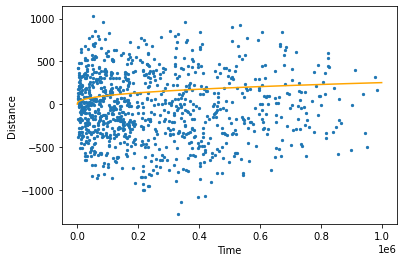

In [54]:
plt.scatter(time_data,diag_dist_data, s = 5)
plt.plot([x for x in range(0,num_points,100)], [1 * x**(2/5) for x in range(0,num_points,100)], color = "orange")
plt.xlabel('Time')
plt.ylabel('Distance')

# plt.yscale('log')
# plt.xscale('log')

R-squared: 0.314521
0.49093725772678615


Text(0, 0.5, 'log(antidiag distance)')

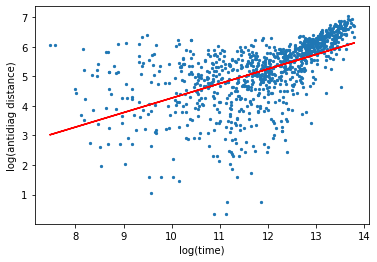

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
rng = np.random.default_rng()
# Generate some data:

x,y = np.absolute(time_data),np.absolute(antidiag_dist_data)


x,y = x[np.logical_and(x>1, y>1)], y[np.logical_and(x>1, y>1)]

x,y = np.log(x), np.log(y)
# Perform the linear regression:

res = stats.linregress(x, y)
# Coefficient of determination (R-squared):

print(f"R-squared: {res.rvalue**2:.6f}")
print(res.slope)

# R-squared: 0.717533
# Plot the data along with the fitted line:

plt.scatter(x, y, s = 5)#, 'o', label='original data')
plt.plot(x, res.intercept + res.slope*np.array(x), 'r', label='fitted line')

plt.xlabel('log(time)')
plt.ylabel('log(antidiag distance)')
# plt.legend()
# plt.show()

In [ ]:
time_data_new = []
dist_data_new = []

num_trials = 10**3


num_points = 4 * n**2 - 4 * n + 1
for trial in range(100):
    i = random.randint(0, num_points - 1)
    j = 0
    
    diag = points[i][0] - points[i][1]
    
    while (i + j < num_points - 1) and (i - j > 0):
        j+= 1

        if i + j <= num_points - 1 and points[i+j][0] - points[i+j][1] == diag:
            time_data_new.append(j)
            dist_data_new.append(np.linalg.norm(points[i+j] - points[i], ord = 2))
        
        if (i - j >= 0) and points[i-j][0] - points[i-j][1] == diag:
            time_data_new.append(j)
            dist_data_new.append(np.linalg.norm(points[i-j] - points[i], ord = 2))

   
    
    

In [ ]:
time_data_new = np.array(time_data_new)
dist_data_new = np.array(dist_data_new)
isnt_out = np.logical_and(time_data_new < 10**10, dist_data_new < 10**5)
plt.scatter(time_data_new ,dist_data_new, s = 5)


plt.xlabel('Time')
plt.ylabel('Distance')
plt.plot([x for x in range(0,80000,100)], [3 * x**(2/5) for x in range(0,80000,100)], color = "orange")

plt.yscale('log')
plt.xscale('log')

In [ ]:
#print(sorted(time_data))


In [ ]:
#print(sorted(dist_data))